In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from utilities import visualize_classifier

In [3]:
input_file = './data/data_multivar_nb.txt'

In [4]:
data = np.loadtxt(input_file, delimiter= ',')

In [5]:
X, y = data[:, :-1], data[:, -1]

In [6]:
classifier = GaussianNB()

In [7]:
classifier.fit(X, y)

GaussianNB(priors=None)

In [8]:
y_pred = classifier.predict(X)

In [9]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]

In [10]:
print("Accuracy of Naive Bayes classifier = ", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier =  99.75 %


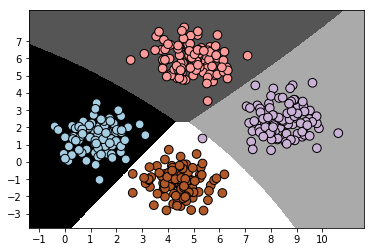

In [11]:
visualize_classifier(classifier, X, y)

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2, random_state = 3)

In [13]:
classifier_new = GaussianNB()

In [14]:
classifier_new.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
y_test_pred = classifier_new.predict(X_test)

In [16]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]

In [17]:
print("Accuracy of the new classifier = ", X_test, y_test)

Accuracy of the new classifier =  [[ 0.01  0.19]
 [ 1.67  0.81]
 [ 4.45  4.86]
 [ 8.04  1.6 ]
 [ 3.27 -1.06]
 [ 4.46  6.19]
 [ 0.55  0.7 ]
 [ 1.64  0.48]
 [ 9.31  2.93]
 [ 0.31  1.5 ]
 [ 3.85  7.08]
 [ 3.46 -2.51]
 [ 4.46 -0.21]
 [ 5.2  -1.74]
 [ 4.6  -1.53]
 [ 7.29  1.79]
 [ 5.76  4.67]
 [ 7.48  3.28]
 [ 8.64  2.82]
 [ 0.63  1.5 ]
 [ 8.45  2.15]
 [ 1.24  3.41]
 [ 3.89  0.14]
 [ 9.78  2.65]
 [ 5.93  7.36]
 [ 9.31  1.57]
 [ 4.36 -2.54]
 [ 4.05 -0.61]
 [ 1.85  0.23]
 [ 1.64  0.96]
 [ 9.04  2.81]
 [ 5.6   5.93]
 [ 1.6   1.68]
 [ 7.06  3.23]
 [ 4.43 -2.43]
 [ 0.98  1.41]
 [ 4.1   6.79]
 [ 1.3   2.01]
 [ 3.66  7.55]
 [-0.04  0.47]
 [ 4.84  6.44]
 [ 4.91 -2.79]
 [ 7.58  3.1 ]
 [ 5.74  6.22]
 [ 4.17 -0.5 ]
 [ 7.6   2.88]
 [ 3.58 -0.23]
 [ 5.   -1.76]
 [ 0.62  1.85]
 [ 5.92  6.03]
 [ 7.77  2.17]
 [ 5.22  6.49]
 [ 4.19 -0.33]
 [ 8.93  1.25]
 [ 3.82 -1.23]
 [ 7.71  1.47]
 [ 3.6  -1.84]
 [ 2.34  1.26]
 [ 4.04  0.71]
 [ 5.52  4.55]
 [ 0.42  1.95]
 [ 9.79  0.8 ]
 [ 0.28  0.4 ]
 [ 9.02  2.76]
 [ 8.9

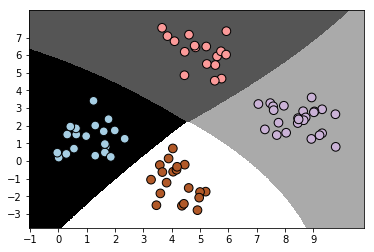

In [18]:
visualize_classifier(classifier_new, X_test, y_test)

In [19]:
num_folds = 3
accuracy_values = cross_validation.cross_val_score(classifier, X, y, scoring = 'accuracy', cv = num_folds)
print('Accuracy : ' + str(round(100 * accuracy_values.mean(), 2)) + '%' )
precision_values = cross_validation.cross_val_score(classifier, X, y, scoring = 'precision_weighted', cv = num_folds)
print('Precision : ', str(round(100 * precision_values.mean(), 2)) + '%')

Accuracy : 99.75%
Precision :  99.76%


In [20]:
recall_values = cross_validation.cross_val_score(classifier, X, y, scoring = 'recall_weighted', cv = num_folds)
print('Recall : ' + str(round(100 * recall_values.mean(), 2)) + '%')
f1_values = cross_validation.cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = num_folds)
print('F1 : ', str(round(100 * f1_values.mean(), 2)))

Recall : 99.75%
F1 :  99.75
